# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [2]:
data = pd.read_csv('cleaned_salary_schedule_2024.csv')

In [3]:
data

,Paystep,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
0,1A,64789,66964,70983,72832,76848,75009,80873
1,1B,64789,66964,70983,72832,76848,75009,80873
2,2A,66078,68253,72272,74121,78137,76298,82162
3,2B,66078,68253,72272,74121,78137,76298,82162
4,3A,66623,68798,72817,74666,78682,76843,82707
5,3B,66623,68798,72817,74666,78682,76843,82707
6,4A,67588,69763,73782,75631,79647,77808,83672
7,4B,67588,69763,73782,75631,79647,77808,83672
8,5A,68422,70597,74616,76465,80481,78642,84506
9,5B,68422,70597,74616,76465,80481,78642,84506


In [4]:
data[data['Paystep'].str.contains('A')].select_dtypes(include='number').pct_change(axis=0).round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.02,0.02,0.02,0.02,0.02,0.02
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01
6,0.01,0.01,0.01,0.01,0.01,0.01,0.01
8,0.01,0.01,0.01,0.01,0.01,0.01,0.01
10,0.01,0.01,0.01,0.01,0.01,0.01,0.01
11,0.02,0.02,0.02,0.02,0.02,0.02,0.02
14,0.03,0.02,0.02,0.02,0.02,0.02,0.02
15,0.02,0.02,0.02,0.02,0.02,0.02,0.02
18,0.10,0.09,0.09,0.09,0.08,0.09,0.08


In [5]:
data[data['Paystep'].str.contains('A')].select_dtypes(include='number').pct_change(axis=1).round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
0,NaN,0.03,0.06,0.03,0.06,-0.02,0.08
2,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
4,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
6,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
8,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
10,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
11,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
14,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
15,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
18,NaN,0.03,0.05,0.02,0.05,-0.02,0.06


In [6]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').pct_change().round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.02,0.02,0.02,0.02,0.02,0.02
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01
7,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,0.01,0.01,0.01,0.01,0.01,0.01,0.01
12,0.03,0.03,0.03,0.03,0.03,0.03,0.03
13,0.02,0.02,0.02,0.02,0.02,0.02,0.02
16,0.07,0.07,0.06,0.06,0.06,0.06,0.06
17,0.02,0.02,0.02,0.02,0.02,0.02,0.01
20,0.10,0.10,0.09,0.09,0.09,0.09,0.08


In [7]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').pct_change(axis=1).round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,0.03,0.06,0.03,0.06,-0.02,0.08
3,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
5,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
7,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
9,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
12,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
13,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
16,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
17,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
20,NaN,0.03,0.05,0.02,0.04,-0.02,0.06


In [8]:
df = read_and_filter_data()

In [9]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').diff() - (65.60*24)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-285.4,-285.4,-285.4,-285.4,-285.4,-285.4,-285.4
5,-1029.4,-1029.4,-1029.4,-1029.4,-1029.4,-1029.4,-1029.4
7,-609.4,-609.4,-609.4,-609.4,-609.4,-609.4,-609.4
9,-740.4,-740.4,-740.4,-740.4,-740.4,-740.4,-740.4
12,595.6,595.6,595.6,595.6,595.6,595.6,595.6
13,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4
16,3373.6,3373.6,3373.6,3373.6,3373.6,3373.6,3373.6
17,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4
20,6112.6,6112.6,6112.6,6112.6,6112.6,6112.6,6112.6


In [10]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').diff(axis=1) - (65.60*24)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
3,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
5,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
7,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
9,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
12,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
13,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
16,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
17,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
20,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6


In [11]:
df[(df['Salary Monetary Diff'] - (65.60*24)) <= 0].sort_values('Salary Monetary Diff', ascending=False)

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
232188,2019,SusanMJaquish2012-09-04,2012-09-04,2012,7,6-10,79903.0,60k-80k,2.00,1567.0,0-5%,0-5k
201770,2019,RachelleGarcia2008-08-28,2008-08-28,2008,11,11-15,79903.0,60k-80k,2.00,1567.0,0-5%,0-5k
177239,2019,MichealLRice2008-08-28,2008-08-28,2008,11,11-15,79903.0,60k-80k,2.00,1567.0,0-5%,0-5k
185690,2020,NatalieKavral2013-09-03,2013-09-03,2013,7,6-10,63865.0,60k-80k,2.50,1557.0,0-5%,0-5k
169894,2019,MeganELetavish2017-09-05,2017-09-05,2017,2,0-5,78684.0,60k-80k,2.00,1543.0,0-5%,0-5k
...,...,...,...,...,...,...,...,...,...,...,...,...
119466,2023,JosephCarbone1996-09-03,1996-09-03,1996,27,26-30,77194.0,60k-80k,-40.00,-51463.0,NaN,NaN
19285,2022,AnthonyBright1998-02-11,1998-02-11,1998,24,21-25,77194.0,60k-80k,-40.00,-51463.0,NaN,NaN
157568,2019,MargaretMGiustino Desimo2001-03-12,2001-03-12,2001,18,16-20,62430.0,60k-80k,-45.48,-52079.0,NaN,NaN
151112,2023,LizandraDelacruz Santia1999-09-07,1999-09-07,1999,24,21-25,77194.0,60k-80k,-40.59,-52730.0,NaN,NaN


In [12]:
df[df['Years of Employment']>=8].sort_values('Salary Monetary Diff', ascending=False)

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
157569,2020,MargaretMGiustino Desimo2001-03-12,2001-03-12,2001,19,16-20,120606.0,120k-140k,93.19,58176.0,50-100%,50k-60k
216927,2021,SantinaCammariere2000-09-05,2000-09-05,2000,21,21-25,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
231596,2021,SusanAPenfield2000-08-28,2000-08-28,2000,21,21-25,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
189020,2023,NicoleEverett1988-04-18,1988-04-18,1988,35,31-35,128657.0,120k-140k,80.47,57367.0,50-100%,50k-60k
81670,2023,FredericaDe Leo2001-09-04,2001-09-04,2001,22,21-25,122424.0,120k-140k,83.24,55614.0,50-100%,50k-60k
...,...,...,...,...,...,...,...,...,...,...,...,...
118417,2023,JordanaSGoodman1998-09-08,1998-09-08,1998,25,21-25,77194.0,60k-80k,-40.00,-51463.0,NaN,NaN
223939,2023,ShevaughnaMWright1995-09-05,1995-09-05,1995,28,26-30,77194.0,60k-80k,-40.00,-51463.0,NaN,NaN
157568,2019,MargaretMGiustino Desimo2001-03-12,2001-03-12,2001,18,16-20,62430.0,60k-80k,-45.48,-52079.0,NaN,NaN
151112,2023,LizandraDelacruz Santia1999-09-07,1999-09-07,1999,24,21-25,77194.0,60k-80k,-40.59,-52730.0,NaN,NaN


In [13]:
df[df['FirstMidLastStart']=='SantinaCammariere2000-09-05']

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
216925,2019,SantinaCammariere2000-09-05,2000-09-05,2000,19,16-20,105469.0,100k-120k,3.39,3460.0,0-5%,0-5k
216926,2020,SantinaCammariere2000-09-05,2000-09-05,2000,20,16-20,64864.0,60k-80k,-38.50,-40605.0,NaN,NaN
216927,2021,SantinaCammariere2000-09-05,2000-09-05,2000,21,21-25,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
216928,2022,SantinaCammariere2000-09-05,2000-09-05,2000,22,21-25,122424.0,120k-140k,0.00,0.0,NaN,NaN
216929,2023,SantinaCammariere2000-09-05,2000-09-05,2000,23,21-25,128657.0,120k-140k,5.09,6233.0,5-10%,5k-10k


In [14]:
df[df['FirstMidLastStart']=='AileenAlvarado1998-02-23']

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
2735,2019,AileenAlvarado1998-02-23,1998-02-23,1998,21,21-25,65268.0,60k-80k,12.89,7451.0,10-15%,5k-10k
2736,2020,AileenAlvarado1998-02-23,1998-02-23,1998,22,21-25,111500.0,100k-120k,70.83,46232.0,50-100%,40k-50k
2737,2021,AileenAlvarado1998-02-23,1998-02-23,1998,23,21-25,121078.0,120k-140k,8.59,9578.0,5-10%,5k-10k
2738,2022,AileenAlvarado1998-02-23,1998-02-23,1998,24,21-25,121078.0,120k-140k,0.00,0.0,NaN,NaN
2739,2023,AileenAlvarado1998-02-23,1998-02-23,1998,25,21-25,121078.0,120k-140k,0.00,0.0,NaN,NaN


In [15]:
df[df['FirstMidLastStart']=='SusanAPenfield2000-08-28']

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
231594,2019,SusanAPenfield2000-08-28,2000-08-28,2000,19,16-20,105469.0,100k-120k,3.39,3460.0,0-5%,0-5k
231595,2020,SusanAPenfield2000-08-28,2000-08-28,2000,20,16-20,64864.0,60k-80k,-38.50,-40605.0,NaN,NaN
231596,2021,SusanAPenfield2000-08-28,2000-08-28,2000,21,21-25,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
231597,2022,SusanAPenfield2000-08-28,2000-08-28,2000,22,21-25,122424.0,120k-140k,0.00,0.0,NaN,NaN
231598,2023,SusanAPenfield2000-08-28,2000-08-28,2000,23,21-25,128657.0,120k-140k,5.09,6233.0,5-10%,5k-10k


In [16]:
print(f'Annual United Teachers Federation Dues: ${round(65.60*24,2)}')

Annual United Teachers Federation Dues: $1574.4


In [17]:
df.head(2).T

,0,1
Fiscal Year,2019,2020
FirstMidLastStart,A DilanganiDilrukshi2011-09-01,A DilanganiDilrukshi2011-09-01
Hire Date,2011-09-01 00:00:00,2011-09-01 00:00:00
Hire Year,2011,2011
Years of Employment,8,9
Employment Category,6-10,6-10
Salary,79005.0,89263.0
Salary Category,60k-80k,80k-100k
Salary Delta,9.84,12.98
Salary Monetary Diff,7075.0,10258.0


In [18]:
df.tail(2).T

,254475,254476
Fiscal Year,2022,2023
FirstMidLastStart,ZyliDabi2008-08-28,ZyliDabi2008-08-28
Hire Date,2008-08-28 00:00:00,2008-08-28 00:00:00
Hire Year,2008,2008
Years of Employment,14,15
Employment Category,11-15,11-15
Salary,104145.0,104145.0
Salary Category,100k-120k,100k-120k
Salary Delta,5.75,0.0
Salary Monetary Diff,5659.0,0.0


In [19]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,254477.0,2021.0,2019.0,2020.0,2021.0,2022.0,2023.0,1.0
Hire Date,254477,2006-11-06 05:50:21.712767488,1980-02-01 00:00:00,2000-06-14 00:00:00,2006-08-31 00:00:00,2014-09-02 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,254477.0,2006.0,1980.0,2000.0,2006.0,2014.0,2023.0,9.0
Years of Employment,254477.0,15.0,0.0,7.0,15.0,21.0,43.0,9.0
Salary,254477.0,97807.0,49385.0,83924.0,98644.0,111350.0,148657.0,19315.0
Salary Delta,254477.0,4.0,-45.0,0.0,3.0,5.0,101.0,6.0
Salary Monetary Diff,254477.0,3623.0,-56610.0,0.0,2602.0,5438.0,58176.0,4951.0


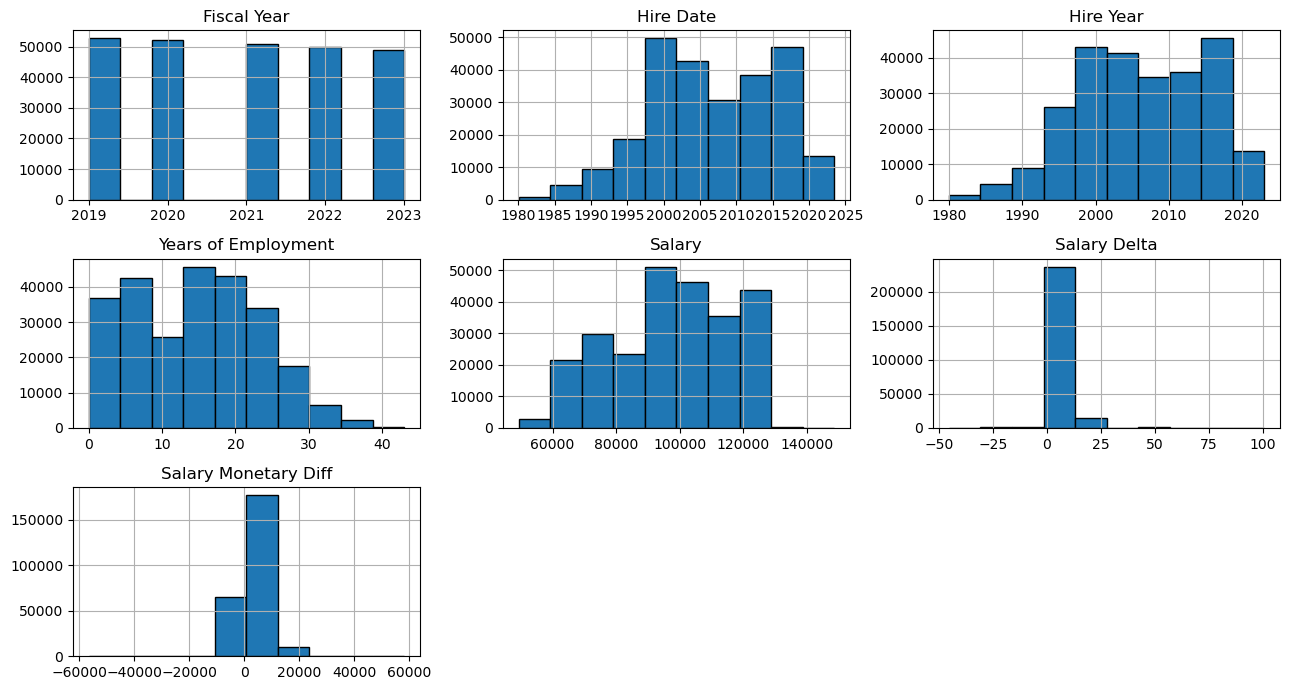

In [20]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

In [21]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
category_cols = df.select_dtypes(exclude='number').columns.to_list()

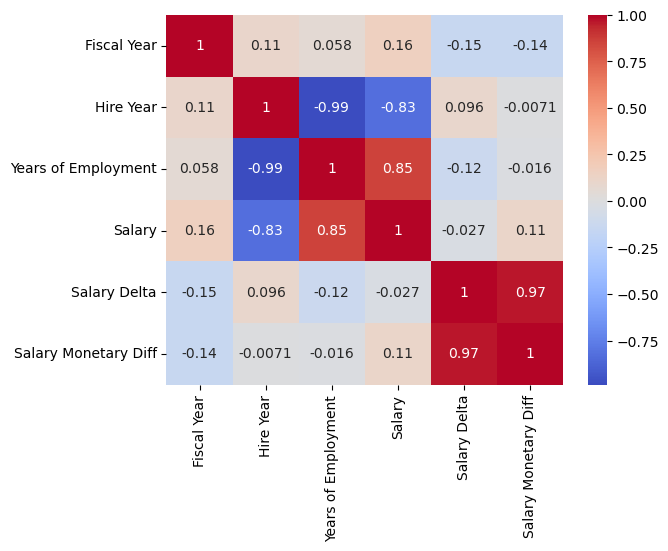

In [22]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm');

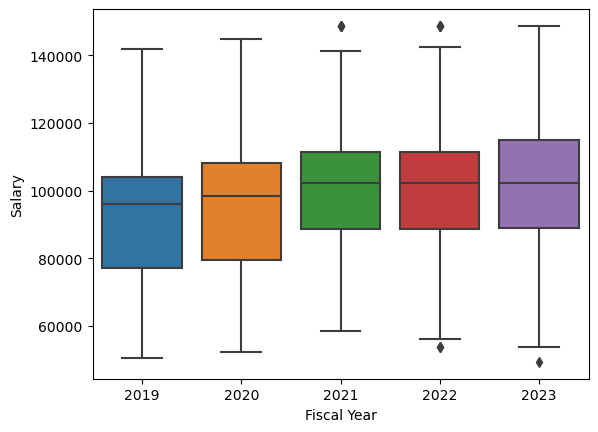

In [23]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

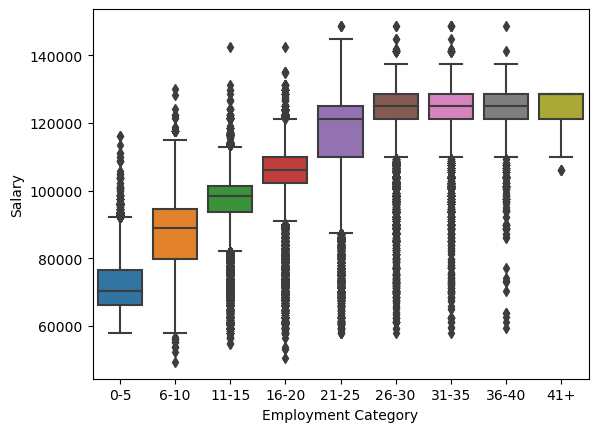

In [24]:
sns.boxplot(data=df, y='Salary', x='Employment Category');

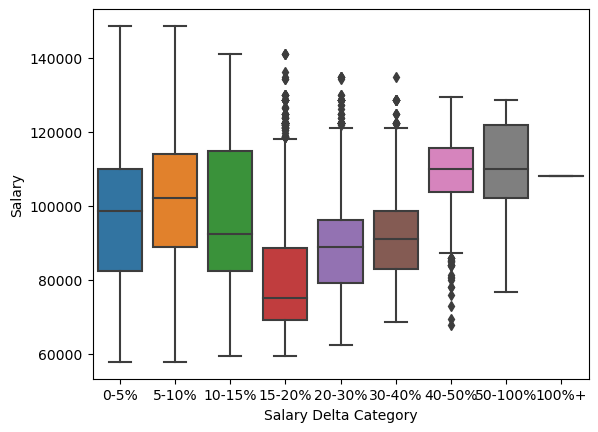

In [25]:
sns.boxplot(data=df, y='Salary', x='Salary Delta Category');

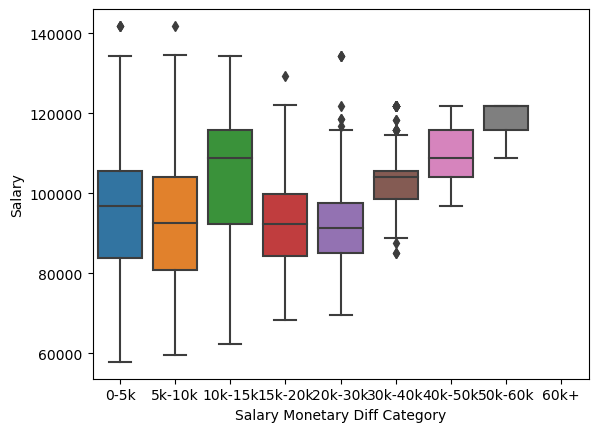

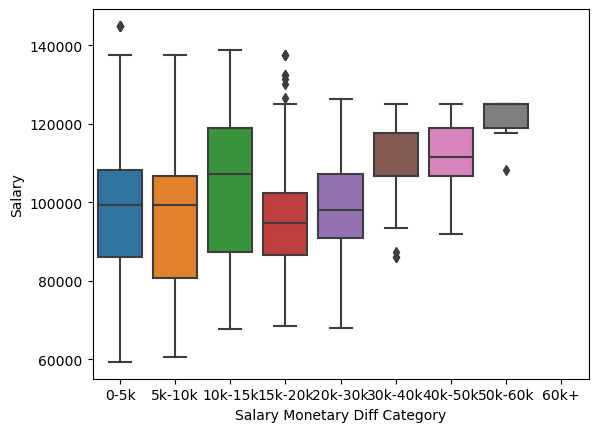

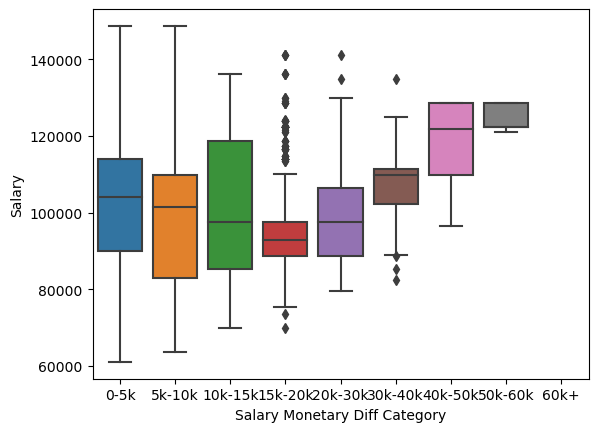

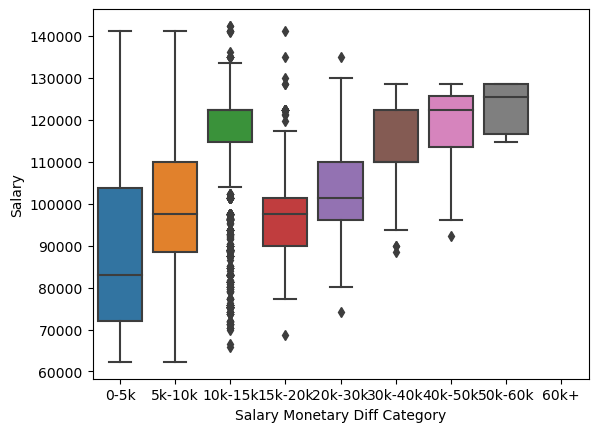

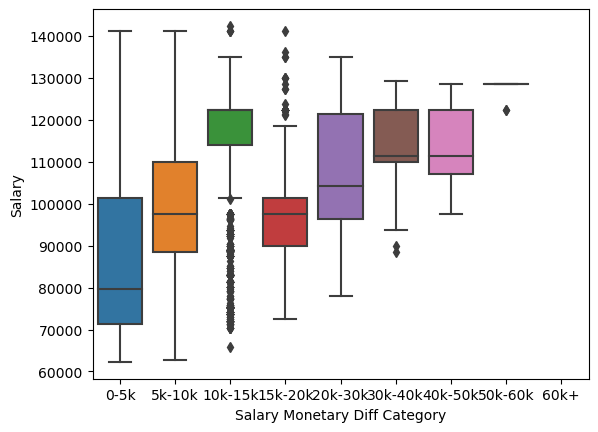

In [26]:
years = [2019,2020,2021,2022,2023]

for y in years:
    sns.boxplot(data=df[df['Fiscal Year']==y], y='Salary', x='Salary Monetary Diff Category')
    plt.show();

In [27]:
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))

In [28]:
pd.crosstab(df['Fiscal Year'], df['Salary Delta Category'],
            normalize='columns')

Salary Delta Category,0-5%,5-10%,10-15%,15-20%,20-30%,30-40%,40-50%,50-100%,100%+
Fiscal Year,,,,,,,,,
2019,0.284861,0.179455,0.227762,0.254867,0.238865,0.176796,0.216263,0.191542,0.0
2020,0.270260,0.221041,0.248799,0.235578,0.212664,0.154696,0.207612,0.231343,1.0
2021,0.258309,0.227785,0.276273,0.328273,0.325764,0.367403,0.219723,0.258706,0.0
2022,0.093939,0.188775,0.130307,0.084122,0.103930,0.124309,0.138408,0.092040,0.0
2023,0.092631,0.182944,0.116859,0.097160,0.118777,0.176796,0.217993,0.226368,0.0


In [29]:
pd.crosstab(df['Fiscal Year'], df['Salary Delta Category'],
            normalize='index')

Salary Delta Category,0-5%,5-10%,10-15%,15-20%,20-30%,30-40%,40-50%,50-100%,100%+
Fiscal Year,,,,,,,,,
2019,0.694678,0.159770,0.098856,0.029748,0.011403,0.001334,0.002606,0.001605,0.000000
2020,0.654406,0.195401,0.107222,0.027302,0.010081,0.001159,0.002484,0.001925,0.000021
2021,0.621174,0.199979,0.118244,0.037784,0.015336,0.002734,0.002611,0.002138,0.000000
2022,0.485487,0.356174,0.119859,0.020808,0.010515,0.001988,0.003534,0.001635,0.000000
2023,0.488570,0.352270,0.109698,0.024528,0.012264,0.002886,0.005681,0.004103,0.000000


In [30]:
pd.crosstab(df['Employment Category'], df['Salary Delta Category'],
            normalize='columns',)

Salary Delta Category,0-5%,5-10%,10-15%,15-20%,20-30%,30-40%,40-50%,50-100%,100%+
Employment Category,,,,,,,,,
0-5,0.213831,0.077528,0.184390,0.519736,0.302620,0.256906,0.048443,0.014925,0.0
6-10,0.124491,0.224928,0.364649,0.322200,0.456769,0.328729,0.069204,0.082090,0.0
11-15,0.169208,0.179994,0.069645,0.072156,0.091703,0.140884,0.058824,0.099502,0.0
16-20,0.240588,0.226099,0.084726,0.053224,0.080349,0.132597,0.435986,0.315920,0.0
21-25,0.136870,0.251926,0.267819,0.024647,0.055895,0.118785,0.259516,0.388060,1.0
26-30,0.072047,0.028941,0.021806,0.005715,0.007860,0.011050,0.107266,0.079602,0.0
31-35,0.035698,0.008898,0.005908,0.002143,0.004803,0.011050,0.020761,0.017413,0.0
36-40,0.007172,0.001569,0.001057,0.000179,0.000000,0.000000,0.000000,0.002488,0.0
41+,0.000094,0.000117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [31]:
pd.crosstab(df['Employment Category'], df['Salary Delta Category'],
            normalize='index',)

Salary Delta Category,0-5%,5-10%,10-15%,15-20%,20-30%,30-40%,40-50%,50-100%,100%+
Employment Category,,,,,,,,,
0-5,0.696885,0.092244,0.106954,0.081072,0.019307,0.002591,0.000780,0.000167,0.00000
6-10,0.418441,0.276011,0.218142,0.051835,0.030055,0.003419,0.001149,0.000948,0.00000
11-15,0.667139,0.259083,0.048871,0.013616,0.007078,0.001719,0.001146,0.001348,0.00000
16-20,0.695377,0.238579,0.043585,0.007363,0.004546,0.001186,0.006226,0.003138,0.00000
21-25,0.485741,0.326406,0.169164,0.004187,0.003883,0.001305,0.004551,0.004733,0.00003
26-30,0.820962,0.120397,0.044224,0.003117,0.001753,0.000390,0.006039,0.003117,0.00000
31-35,0.883810,0.080423,0.026032,0.002540,0.002328,0.000847,0.002540,0.001481,0.00000
36-40,0.902151,0.072043,0.023656,0.001075,0.000000,0.000000,0.000000,0.001075,0.00000
41+,0.687500,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
